## Imports


In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 12.7MB/s 
     |████████████████████████████████| 6.5MB 22.8MB/s 
     |████████████████████████████████| 14.8MB 285kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,os,random,math,calendar
import datetime
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
from geopandas import GeoDataFrame

import warnings
warnings.simplefilter('ignore')

## Connecting to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Rainfall

In [ ]:
rainfall = pd.read_csv("drive/MyDrive/BTP/Final-Data/rainfall.csv")
rainfall.head()

,Date,POCRTC Pandharpur Solapur,KRS Panvel Raigad,"PINPALGAON, AHMEDNAGAR",SRS Basmat Nagar Higoli,Swantra pul vasahat Atpadi Sangli,RRSSC,"CoA,Barsi bypass road,Osmanabad",CA Dhule,ARS Nagpur road Amravathi,WDPSD Wari Telhara Akola,Shahanoor (Shahanoor irrigation Section),ARS CHAS AHMEDNAGAR,HMPSD Kamarli Pen Raigad,"ARS SALVIHIR FARM,KOPERGAON",GWRSD Bhamragad Gadchiroli,RCRS Bhatye Ratangiri,RWRRS Mahabaleshwar Satara,"RLG, EAD, BARC, Trombay-2, Mumbai","ARS SHRIRAMPUR,AHMEDNAGAR","AS,Manjari Farm,Haveli,Pune",Chikaldara (Chikadara wireless station),"Elephanta Caves, Elephanta","CRS,Udgir,Latur",Chamorshi (Irrigation section),Malegaon Girana Malegaon Nashik,KVK Killa Roha Raigad,APSD Digras Yeotmal,WRSD Wardha Sirpur Deoli Wardha,"Bhatsa Dam Division, Shahapura","Ajanta Caves, Fardapur, Aurangabad",Naigaon (MPM sub division No.2),ARS Radhanagar Kolhapur,"KVK,Tuljapur,Osmanabad",Ashti (M I sub division),RARS Karjat Raigad,"ZARS RAVIVARPETH,SOLAPUR",WRRGS Jafrabad Jalna,"ARS NIPHAD, NASIK",WRSD Rejewadi post Selu Parbhani,...,Bhatghar Vasahat Bhor Pune,KVK Hiwara Gondia,SHPSD Shirur Pune,ARS MOHEL SOLAPUR,ARS Palghar Thane,CRS Udgir Latur,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",Pimpalner (Panzara irrigation colony),BRS Ramtek Nagpur,Sinchan Satana Nashik,VHSD Javhar Vaitarnagar Nashik,ARS Buldhana Buldhana,Daund (Bhima lift irrigation section),Kinwat (Irrigation management sub-division),MMP Raver Jalgaon,Bhandara (Silli Godown),ARS Achalpur Amravathi,Dindori Peth Nashik,"ZARS,Ganeshkhind,Pune",HPSD Bhusawal Jalgaon,Newasa Sangamner Ahmednagar,CA Kolhapur,Gadchandur (Irrigation Section),"M. I. Tank, Sullipada, Navapur",ZARC Waghapur Road Yevatmal,"ARS VADGAON,PUNE","BABA POINT, EAD,BARC ,trombay-4, Mumbai",CA Nagpur,ARS Washim Washim,"ARS JEYUR KARMALA, SOLAPUR",Hadgaon (Upper Penganga project division),WRD Sahagad Ambad Jalna,WRSD Weghere Mulshi Pune,"ASCAE,Ahmednagar","BRS,Vaijapur,Aurangabad","ORS,Nanded Road,Latur",Borgaon Kalwan Nashik,Wadsa (Itiadoh Irrigation management sub division),"MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai","ARS,Kasabe,Digraj,Sangli"
0,2008-09-24,313.0,452.0,525.677099,198.0,299.343454,2050.000000,641.0,0.0,0.357143,189.029443,193.455182,1101.0,349.804967,972.0,464.545565,331.051090,845.142857,249.096620,746.0,602.0,579.014336,728.110235,184.936394,149.415009,26.0,624.0,149.587590,38.0,306.047548,205.250919,302.777873,493.0,1203.0,250.952542,690.0,1059.0,60.0,23.0,240.887755,...,389.943368,163.0,270.675921,1160.0,346.0,510.0,657.0,154.855222,844.375294,212.0,86.505026,189.053381,323.170840,272.751768,75.0,923.152084,407.0,195.0,232.0,36.0,39.0,263.264011,423.249706,173.577222,233.204505,0.0,249.077535,963.313543,137.0,376.0,218.100943,77.0,242.759637,409.0,777.0,783.0,361.0,108.078131,248.803495,292.0
1,2008-09-25,313.0,452.0,538.939076,198.0,301.705018,2050.000000,641.0,0.0,0.000000,186.067663,193.962397,1101.0,357.567741,972.0,464.643669,334.706353,846.000000,250.855692,746.0,602.0,579.783820,729.869052,188.039776,162.329328,26.0,624.0,127.045562,38.0,294.048607,198.965369,287.759566,493.0,1203.0,259.121658,690.0,1059.0,60.0,23.0,247.781799,...,377.341397,163.0,269.632429,1160.0,346.0,510.0,657.0,159.528413,854.055396,212.0,83.371940,199.603463,312.387187,308.787360,75.0,903.891655,407.0,195.0,232.0,36.0,39.0,274.907369,424.005918,178.148912,243.250323,0.0,250.796499,946.562429,137.0,376.0,212.068817,77.0,213.299731,409.0,777.0,783.0,361.0,109.698613,251.605961,292.0
2,2008-09-26,313.0,452.0,527.575915,198.0,298.319773,2050.000000,641.0,0.0,0.000000,194.832603,183.385978,1101.0,352.191515,972.0,407.320552,355.849743,846.000000,254.419395,746.0,602.0,569.421835,733.612537,182.804490,156.096906,26.0,624.0,154.089629,38.0,293.132662,198.926919,253.915992,493.0,1203.0,259.924954,690.0,1059.0,60.0,23.0,253.214754,...,389.900332,163.0,276.059230,1160.0,346.0,510.0,657.0,157.122615,697.260280,212.0,84.351076,206.303704,335.000651,239.671928,75.0,844.769044,407.0,195.0,232.0,36.0,39.0,278.757655,479

In [ ]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Columns: 125 entries, Date to ARS,Kasabe,Digraj,Sangli
dtypes: float64(124), object(1)
memory usage: 3.9+ MB


In [ ]:
rainfall.describe().T

,count,mean,std,min,25%,50%,75%,max
POCRTC Pandharpur Solapur,4116.0,287.136205,262.608875,0.0,69.000000,213.628874,444.175098,2670.260870
KRS Panvel Raigad,4116.0,302.346809,251.647280,0.0,157.189202,253.327469,367.881283,1835.973494
"PINPALGAON, AHMEDNAGAR",4116.0,286.554261,262.183473,0.0,75.909039,249.732253,378.000000,3225.695652
SRS Basmat Nagar Higoli,4116.0,249.577943,226.162221,0.0,37.338504,220.996200,393.000000,3192.086957
Swantra pul vasahat Atpadi Sangli,4116.0,249.846261,202.250945,0.0,94.000000,174.545775,402.355917,1205.691337
...,...,...,...,...,...,...,...,...
"ORS,Nanded Road,Latur",4116.0,296.816378,318.411245,0.0,23.000000,153.521247,589.000000,2913.833333
Borgaon Kalwan Nashik,4116.0,201.985256,93.799585,0.0,148.324524,187.114923,243.458967,1077.100922
Wadsa (Itiadoh Irrigation management sub division),4116.0,287.487850,301.360700,0.0,43.000000,201.000000,491.628075,1736.000000
"MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai",4116.0,196.363561,300.673255,0.0,32.830253,105.855975,235.745919,2656.000000


In [ ]:
rainfall['Date'] = pd.to_datetime(rainfall['Date'])

In [ ]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Columns: 125 entries, Date to ARS,Kasabe,Digraj,Sangli
dtypes: datetime64[ns](1), float64(124)
memory usage: 3.9 MB


In [ ]:
def get_month(x):
  i = x.month
  return calendar.month_abbr[i]


In [ ]:
rainfall['month'] = rainfall['Date'].apply(get_month)

In [ ]:
rainfall.head()

,Date,POCRTC Pandharpur Solapur,KRS Panvel Raigad,"PINPALGAON, AHMEDNAGAR",SRS Basmat Nagar Higoli,Swantra pul vasahat Atpadi Sangli,RRSSC,"CoA,Barsi bypass road,Osmanabad",CA Dhule,ARS Nagpur road Amravathi,WDPSD Wari Telhara Akola,Shahanoor (Shahanoor irrigation Section),ARS CHAS AHMEDNAGAR,HMPSD Kamarli Pen Raigad,"ARS SALVIHIR FARM,KOPERGAON",GWRSD Bhamragad Gadchiroli,RCRS Bhatye Ratangiri,RWRRS Mahabaleshwar Satara,"RLG, EAD, BARC, Trombay-2, Mumbai","ARS SHRIRAMPUR,AHMEDNAGAR","AS,Manjari Farm,Haveli,Pune",Chikaldara (Chikadara wireless station),"Elephanta Caves, Elephanta","CRS,Udgir,Latur",Chamorshi (Irrigation section),Malegaon Girana Malegaon Nashik,KVK Killa Roha Raigad,APSD Digras Yeotmal,WRSD Wardha Sirpur Deoli Wardha,"Bhatsa Dam Division, Shahapura","Ajanta Caves, Fardapur, Aurangabad",Naigaon (MPM sub division No.2),ARS Radhanagar Kolhapur,"KVK,Tuljapur,Osmanabad",Ashti (M I sub division),RARS Karjat Raigad,"ZARS RAVIVARPETH,SOLAPUR",WRRGS Jafrabad Jalna,"ARS NIPHAD, NASIK",WRSD Rejewadi post Selu Parbhani,...,KVK Hiwara Gondia,SHPSD Shirur Pune,ARS MOHEL SOLAPUR,ARS Palghar Thane,CRS Udgir Latur,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",Pimpalner (Panzara irrigation colony),BRS Ramtek Nagpur,Sinchan Satana Nashik,VHSD Javhar Vaitarnagar Nashik,ARS Buldhana Buldhana,Daund (Bhima lift irrigation section),Kinwat (Irrigation management sub-division),MMP Raver Jalgaon,Bhandara (Silli Godown),ARS Achalpur Amravathi,Dindori Peth Nashik,"ZARS,Ganeshkhind,Pune",HPSD Bhusawal Jalgaon,Newasa Sangamner Ahmednagar,CA Kolhapur,Gadchandur (Irrigation Section),"M. I. Tank, Sullipada, Navapur",ZARC Waghapur Road Yevatmal,"ARS VADGAON,PUNE","BABA POINT, EAD,BARC ,trombay-4, Mumbai",CA Nagpur,ARS Washim Washim,"ARS JEYUR KARMALA, SOLAPUR",Hadgaon (Upper Penganga project division),WRD Sahagad Ambad Jalna,WRSD Weghere Mulshi Pune,"ASCAE,Ahmednagar","BRS,Vaijapur,Aurangabad","ORS,Nanded Road,Latur",Borgaon Kalwan Nashik,Wadsa (Itiadoh Irrigation management sub division),"MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai","ARS,Kasabe,Digraj,Sangli",month
0,2008-09-24,313.0,452.0,525.677099,198.0,299.343454,2050.000000,641.0,0.0,0.357143,189.029443,193.455182,1101.0,349.804967,972.0,464.545565,331.051090,845.142857,249.096620,746.0,602.0,579.014336,728.110235,184.936394,149.415009,26.0,624.0,149.587590,38.0,306.047548,205.250919,302.777873,493.0,1203.0,250.952542,690.0,1059.0,60.0,23.0,240.887755,...,163.0,270.675921,1160.0,346.0,510.0,657.0,154.855222,844.375294,212.0,86.505026,189.053381,323.170840,272.751768,75.0,923.152084,407.0,195.0,232.0,36.0,39.0,263.264011,423.249706,173.577222,233.204505,0.0,249.077535,963.313543,137.0,376.0,218.100943,77.0,242.759637,409.0,777.0,783.0,361.0,108.078131,248.803495,292.0,Sep
1,2008-09-25,313.0,452.0,538.939076,198.0,301.705018,2050.000000,641.0,0.0,0.000000,186.067663,193.962397,1101.0,357.567741,972.0,464.643669,334.706353,846.000000,250.855692,746.0,602.0,579.783820,729.869052,188.039776,162.329328,26.0,624.0,127.045562,38.0,294.048607,198.965369,287.759566,493.0,1203.0,259.121658,690.0,1059.0,60.0,23.0,247.781799,...,163.0,269.632429,1160.0,346.0,510.0,657.0,159.528413,854.055396,212.0,83.371940,199.603463,312.387187,308.787360,75.0,903.891655,407.0,195.0,232.0,36.0,39.0,274.907369,424.005918,178.148912,243.250323,0.0,250.796499,946.562429,137.0,376.0,212.068817,77.0,213.299731,409.0,777.0,783.0,361.0,109.698613,251.605961,292.0,Sep
2,2008-09-26,313.0,452.0,527.575915,198.0,298.319773,2050.000000,641.0,0.0,0.000000,194.832603,183.385978,1101.0,352.191515,972.0,407.320552,355.849743,846.000000,254.419395,746.0,602.0,569.421835,733.612537,182.804490,156.096906,26.0,624.0,154.089629,38.0,293.132662,198.926919,253.915992,493.0,1203.0,259.924954,690.0,1059.0,60.0,23.0,253.214754,...,163.0,276.059230,1160.0,346.0,510.0,657.0,157.122615,697.260280,212.0,84.351076,206.303704,335.000651,239.671928,75.0,844.769044,407.0,195.0,232.0,36.0,39.0,278.757655,479.603349,176.952738,191.009864,0.0,254.443750,8

In [ ]:
rainfall['year'] = rainfall['Date'].apply(lambda x : x.year)

In [ ]:
rainfall.head()

,Date,POCRTC Pandharpur Solapur,KRS Panvel Raigad,"PINPALGAON, AHMEDNAGAR",SRS Basmat Nagar Higoli,Swantra pul vasahat Atpadi Sangli,RRSSC,"CoA,Barsi bypass road,Osmanabad",CA Dhule,ARS Nagpur road Amravathi,WDPSD Wari Telhara Akola,Shahanoor (Shahanoor irrigation Section),ARS CHAS AHMEDNAGAR,HMPSD Kamarli Pen Raigad,"ARS SALVIHIR FARM,KOPERGAON",GWRSD Bhamragad Gadchiroli,RCRS Bhatye Ratangiri,RWRRS Mahabaleshwar Satara,"RLG, EAD, BARC, Trombay-2, Mumbai","ARS SHRIRAMPUR,AHMEDNAGAR","AS,Manjari Farm,Haveli,Pune",Chikaldara (Chikadara wireless station),"Elephanta Caves, Elephanta","CRS,Udgir,Latur",Chamorshi (Irrigation section),Malegaon Girana Malegaon Nashik,KVK Killa Roha Raigad,APSD Digras Yeotmal,WRSD Wardha Sirpur Deoli Wardha,"Bhatsa Dam Division, Shahapura","Ajanta Caves, Fardapur, Aurangabad",Naigaon (MPM sub division No.2),ARS Radhanagar Kolhapur,"KVK,Tuljapur,Osmanabad",Ashti (M I sub division),RARS Karjat Raigad,"ZARS RAVIVARPETH,SOLAPUR",WRRGS Jafrabad Jalna,"ARS NIPHAD, NASIK",WRSD Rejewadi post Selu Parbhani,...,SHPSD Shirur Pune,ARS MOHEL SOLAPUR,ARS Palghar Thane,CRS Udgir Latur,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",Pimpalner (Panzara irrigation colony),BRS Ramtek Nagpur,Sinchan Satana Nashik,VHSD Javhar Vaitarnagar Nashik,ARS Buldhana Buldhana,Daund (Bhima lift irrigation section),Kinwat (Irrigation management sub-division),MMP Raver Jalgaon,Bhandara (Silli Godown),ARS Achalpur Amravathi,Dindori Peth Nashik,"ZARS,Ganeshkhind,Pune",HPSD Bhusawal Jalgaon,Newasa Sangamner Ahmednagar,CA Kolhapur,Gadchandur (Irrigation Section),"M. I. Tank, Sullipada, Navapur",ZARC Waghapur Road Yevatmal,"ARS VADGAON,PUNE","BABA POINT, EAD,BARC ,trombay-4, Mumbai",CA Nagpur,ARS Washim Washim,"ARS JEYUR KARMALA, SOLAPUR",Hadgaon (Upper Penganga project division),WRD Sahagad Ambad Jalna,WRSD Weghere Mulshi Pune,"ASCAE,Ahmednagar","BRS,Vaijapur,Aurangabad","ORS,Nanded Road,Latur",Borgaon Kalwan Nashik,Wadsa (Itiadoh Irrigation management sub division),"MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai","ARS,Kasabe,Digraj,Sangli",month,year
0,2008-09-24,313.0,452.0,525.677099,198.0,299.343454,2050.000000,641.0,0.0,0.357143,189.029443,193.455182,1101.0,349.804967,972.0,464.545565,331.051090,845.142857,249.096620,746.0,602.0,579.014336,728.110235,184.936394,149.415009,26.0,624.0,149.587590,38.0,306.047548,205.250919,302.777873,493.0,1203.0,250.952542,690.0,1059.0,60.0,23.0,240.887755,...,270.675921,1160.0,346.0,510.0,657.0,154.855222,844.375294,212.0,86.505026,189.053381,323.170840,272.751768,75.0,923.152084,407.0,195.0,232.0,36.0,39.0,263.264011,423.249706,173.577222,233.204505,0.0,249.077535,963.313543,137.0,376.0,218.100943,77.0,242.759637,409.0,777.0,783.0,361.0,108.078131,248.803495,292.0,Sep,2008
1,2008-09-25,313.0,452.0,538.939076,198.0,301.705018,2050.000000,641.0,0.0,0.000000,186.067663,193.962397,1101.0,357.567741,972.0,464.643669,334.706353,846.000000,250.855692,746.0,602.0,579.783820,729.869052,188.039776,162.329328,26.0,624.0,127.045562,38.0,294.048607,198.965369,287.759566,493.0,1203.0,259.121658,690.0,1059.0,60.0,23.0,247.781799,...,269.632429,1160.0,346.0,510.0,657.0,159.528413,854.055396,212.0,83.371940,199.603463,312.387187,308.787360,75.0,903.891655,407.0,195.0,232.0,36.0,39.0,274.907369,424.005918,178.148912,243.250323,0.0,250.796499,946.562429,137.0,376.0,212.068817,77.0,213.299731,409.0,777.0,783.0,361.0,109.698613,251.605961,292.0,Sep,2008
2,2008-09-26,313.0,452.0,527.575915,198.0,298.319773,2050.000000,641.0,0.0,0.000000,194.832603,183.385978,1101.0,352.191515,972.0,407.320552,355.849743,846.000000,254.419395,746.0,602.0,569.421835,733.612537,182.804490,156.096906,26.0,624.0,154.089629,38.0,293.132662,198.926919,253.915992,493.0,1203.0,259.924954,690.0,1059.0,60.0,23.0,253.214754,...,276.059230,1160.0,346.0,510.0,657.0,157.122615,697.260280,212.0,84.351076,206.303704,335.000651,239.671928,75.0,844.769044,407.0,195.0,232.0,36.0,39.0,278.757655,479.603349,176.952738,191.009864,0.0,254.443750,891.543400,137.0,376.0

## Correlation matrix

In [ ]:
corr_matric = rainfall.drop(['Date','month','year'],axis='columns').corr()

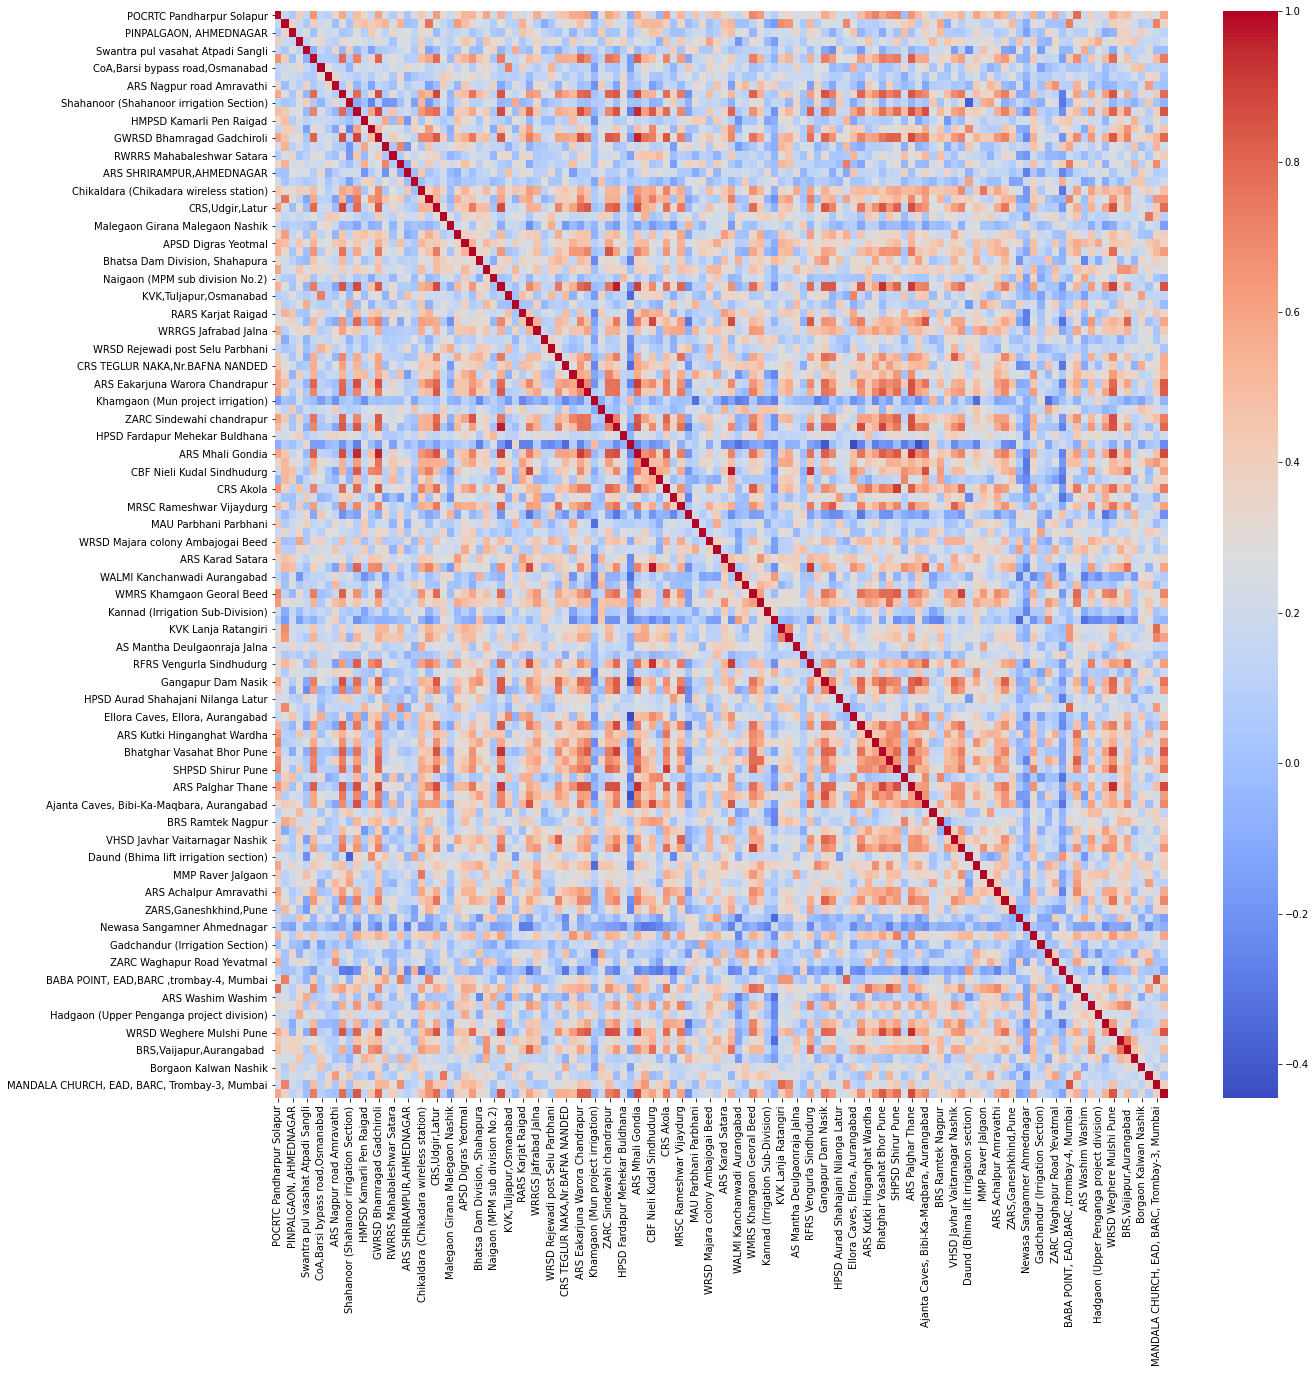

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matric,cmap='coolwarm')
plt.show()

## Rainfall across all years

In [ ]:
rainfall.sum()

POCRTC Pandharpur Solapur                                                                   1.18185e+06
KRS Panvel Raigad                                                                           1.24446e+06
PINPALGAON, AHMEDNAGAR                                                                      1.17946e+06
SRS Basmat Nagar Higoli                                                                     1.02726e+06
Swantra pul vasahat Atpadi Sangli                                                           1.02837e+06
                                                                            ...                        
Wadsa (Itiadoh Irrigation management sub division)                                           1.1833e+06
MANDALA CHURCH, EAD, BARC, Trombay-3, Mumbai                                                     808232
ARS,Kasabe,Digraj,Sangli                                                                    1.10091e+06
month                                                 SepSepSepS

In [ ]:
lowest_rainfall = rainfall.drop(['Date','month','year'],axis='columns').sum().sort_values()[:20]
print(type(lowest_rainfall))
highest_rainfall = rainfall.drop(['Date','month','year'],axis='columns').sum().sort_values()[-20:]

<class 'pandas.core.series.Series'>


In [ ]:
highest_rainfall

Ashti (M I sub division)                   1.477004e+06
RLG, EAD, BARC, Trombay-2, Mumbai          1.506811e+06
CA Kolhapur                                1.518585e+06
Newasa Sangamner Ahmednagar                1.538306e+06
Shirpur (Karwand Medium Project)           1.567688e+06
ARS CHAS AHMEDNAGAR                        1.571276e+06
Manikdoh (Manikdoh dam & canal section)    1.588768e+06
CA Nagpur                                  1.589373e+06
CAET Dapoli Ratangiri                      1.612680e+06
ARS Mhali Gondia                           1.623301e+06
ARS Achalpur Amravathi                     1.855629e+06
ARS Palghar Thane                          1.907155e+06
MRSC Rameshwar Vijaydurg                   1.939542e+06
NARP,Paithan road,Aurangabad               2.041735e+06
CBF Nieli Kudal Sindhudurg                 2.192883e+06
RFRS Vengurla Sindhudurg                   2.244657e+06
ARS Phondaghat Kankavalli Sindhudurg       2.275621e+06
ARS Radhanagar Kolhapur                    2.297

In [ ]:
highest_rainfall = highest_rainfall.to_frame()

In [ ]:
len(highest_rainfall)

20

In [ ]:
highest_rainfall.index

Index(['Ashti (M I sub division)', 'RLG, EAD, BARC, Trombay-2, Mumbai',
       'CA Kolhapur', 'Newasa Sangamner Ahmednagar',
       'Shirpur (Karwand Medium Project)', 'ARS CHAS AHMEDNAGAR',
       'Manikdoh (Manikdoh dam & canal section)', 'CA Nagpur',
       'CAET Dapoli Ratangiri', 'ARS Mhali Gondia', 'ARS Achalpur Amravathi',
       'ARS Palghar Thane', 'MRSC Rameshwar Vijaydurg',
       'NARP,Paithan road,Aurangabad', 'CBF Nieli Kudal Sindhudurg',
       'RFRS Vengurla Sindhudurg', 'ARS Phondaghat Kankavalli Sindhudurg',
       'ARS Radhanagar Kolhapur', 'ARS Lonavala Maval Pune',
       'Bhatghar Vasahat Bhor Pune'],
      dtype='object')

In [ ]:
high_df = pd.DataFrame(rainfall,columns=highest_rainfall.index)

In [ ]:
high_df.head()

,Ashti (M I sub division),"RLG, EAD, BARC, Trombay-2, Mumbai",CA Kolhapur,Newasa Sangamner Ahmednagar,Shirpur (Karwand Medium Project),ARS CHAS AHMEDNAGAR,Manikdoh (Manikdoh dam & canal section),CA Nagpur,CAET Dapoli Ratangiri,ARS Mhali Gondia,ARS Achalpur Amravathi,ARS Palghar Thane,MRSC Rameshwar Vijaydurg,"NARP,Paithan road,Aurangabad",CBF Nieli Kudal Sindhudurg,RFRS Vengurla Sindhudurg,ARS Phondaghat Kankavalli Sindhudurg,ARS Radhanagar Kolhapur,ARS Lonavala Maval Pune,Bhatghar Vasahat Bhor Pune
0,250.952542,249.096620,263.264011,39.0,213.789974,1101.0,205.828046,963.313543,284.605772,945.255067,407.0,346.0,415.658325,1030.0,2492.000000,1622.857143,644.036635,493.0,821.0,389.943368
1,259.121658,250.855692,274.907369,39.0,216.343526,1101.0,204.164102,946.562429,300.394813,936.220862,407.0,346.0,377.640254,1030.0,2492.000000,1624.000000,722.821912,493.0,821.0,377.341397
2,259.924954,254.419395,278.757655,39.0,214.004902,1101.0,210.284280,891.543400,303.774802,892.136595,407.0,346.0,438.067989,1030.0,2492.000000,1624.000000,773.238882,493.0,821.0,389.900332
3,259.075739,251.587998,275.611310,39.0,213.377187,1101.0,215.398248,980.140839,306.060575,904.017691,407.0,346.0,434.349064,1030.0,2492.000000,1624.000000,770.315686,493.0,821.0,391.683525
4,253.858626,244.236622,263.800203,39.0,206.055272,1101.0,207.517694,546.330045,153.030287,887.474123,407.0,346.0,382.490335,1030.0,2492.821429,1624.000000,707.924372,493.0,821.0,383.083843


In [ ]:
high_rainfall_stations = highest_rainfall.index

In [ ]:
latlong = pd.read_csv('drive/MyDrive/BTP/latlong.csv',index_col='Station')
latlong.head()

,Latitude,Longitude
Station,,
POCRTC Pandharpur Solapur,17.658889,75.297500
KRS Panvel Raigad,18.984167,73.101111
"PINPALGAON, AHMEDNAGAR",20.171389,73.987500
SRS Basmat Nagar Higoli,19.342500,77.160556
Swantra pul vasahat Atpadi Sangli,17.405833,74.915833


In [ ]:
high_latlong = latlong.loc[high_rainfall_stations,:]

In [ ]:
high_latlong

,Latitude,Longitude
Ashti (M I sub division),18.799168,75.172500
"RLG, EAD, BARC, Trombay-2, Mumbai",19.014722,72.923888
CA Kolhapur,16.820000,74.268056
Newasa Sangamner Ahmednagar,19.597778,74.189722
Shirpur (Karwand Medium Project),21.449722,74.977500
ARS CHAS AHMEDNAGAR,19.037778,74.650000
Manikdoh (Manikdoh dam & canal section),19.245832,73.819725
CA Nagpur,21.139722,79.069722
CAET Dapoli Ratangiri,17.766667,73.166667
ARS Mhali Gondia,21.389444,80.398333


In [ ]:
high_latlong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Ashti (M I sub division) to Bhatghar Vasahat Bhor Pune
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20 non-null     float64
 1   Longitude  20 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


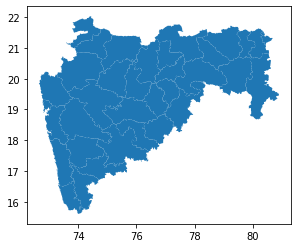

In [ ]:
maha_map = gpd.read_file('drive/MyDrive/BTP/maharashtra.geojson')
maha_map.plot()

In [ ]:
geometry = [Point(xy) for xy in zip(high_latlong["Longitude"],high_latlong["Latitude"])]

In [ ]:
geometry[:3]

In [ ]:
points = high_latlong[['Latitude','Longitude']]

In [ ]:
gdf = GeoDataFrame(points,geometry=geometry)

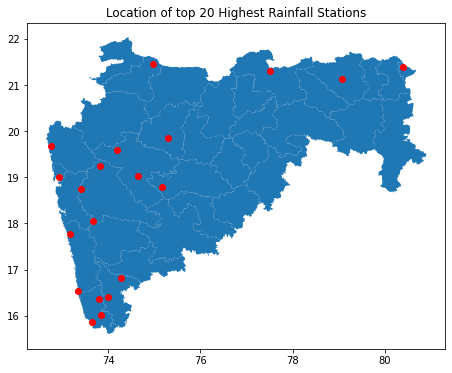

In [ ]:
gdf.plot(ax=maha_map.plot(figsize=(15,6)),marker='o',color='red')
plt.title("Location of top 20 Highest Rainfall Stations")
plt.show()

In [ ]:
lowest_rainfall = lowest_rainfall.to_frame()

In [ ]:
low_rainfall_stations = lowest_rainfall.index

In [ ]:
low_latlong = latlong.loc[low_rainfall_stations,:]
low_latlong.head()

,Latitude,Longitude
WDPSD Wari Telhara Akola,21.181944,76.774167
"ARS NIPHAD, NASIK",20.101667,74.072500
"ZARS IGATPURI, NASIK",19.686667,73.570833
"ZARS,Ganeshkhind,Pune",18.550833,73.822778
Pimpalner (Panzara irrigation colony),20.956667,74.125275


In [ ]:
geometry = [Point(xy) for xy in zip(low_latlong['Longitude'],low_latlong['Latitude'])]
points = low_latlong[['Latitude','Longitude']]

In [ ]:
gdf = GeoDataFrame(points,geometry=geometry)

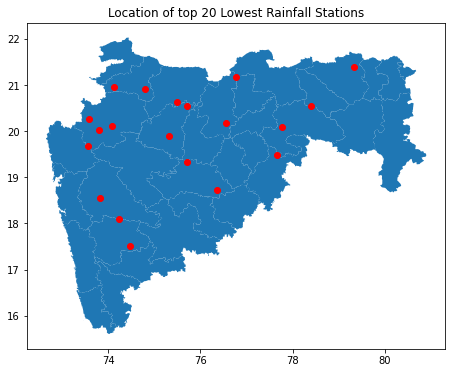

In [ ]:
gdf.plot(ax=maha_map.plot(figsize=(15,6)),marker='o',color='red')
plt.title("Location of top 20 Lowest Rainfall Stations")
plt.show()

## Monthly Average of Highest Rainfall Stations

In [ ]:
high_df['Date'] = rainfall['Date']
high_df['Month'] = rainfall['month']
high_df['Year'] = rainfall['year']

In [ ]:
high_df.head()

,Ashti (M I sub division),"RLG, EAD, BARC, Trombay-2, Mumbai",CA Kolhapur,Newasa Sangamner Ahmednagar,Shirpur (Karwand Medium Project),ARS CHAS AHMEDNAGAR,Manikdoh (Manikdoh dam & canal section),CA Nagpur,CAET Dapoli Ratangiri,ARS Mhali Gondia,ARS Achalpur Amravathi,ARS Palghar Thane,MRSC Rameshwar Vijaydurg,"NARP,Paithan road,Aurangabad",CBF Nieli Kudal Sindhudurg,RFRS Vengurla Sindhudurg,ARS Phondaghat Kankavalli Sindhudurg,ARS Radhanagar Kolhapur,ARS Lonavala Maval Pune,Bhatghar Vasahat Bhor Pune,Date,Month,Year
0,250.952542,249.096620,263.264011,39.0,213.789974,1101.0,205.828046,963.313543,284.605772,945.255067,407.0,346.0,415.658325,1030.0,2492.000000,1622.857143,644.036635,493.0,821.0,389.943368,2008-09-24,Sep,2008
1,259.121658,250.855692,274.907369,39.0,216.343526,1101.0,204.164102,946.562429,300.394813,936.220862,407.0,346.0,377.640254,1030.0,2492.000000,1624.000000,722.821912,493.0,821.0,377.341397,2008-09-25,Sep,2008
2,259.924954,254.419395,278.757655,39.0,214.004902,1101.0,210.284280,891.543400,303.774802,892.136595,407.0,346.0,438.067989,1030.0,2492.000000,1624.000000,773.238882,493.0,821.0,389.900332,2008-09-26,Sep,2008
3,259.075739,251.587998,275.611310,39.0,213.377187,1101.0,215.398248,980.140839,306.060575,904.017691,407.0,346.0,434.349064,1030.0,2492.000000,1624.000000,770.315686,493.0,821.0,391.683525,2008-09-27,Sep,2008
4,253.858626,244.236622,263.800203,39.0,206.055272,1101.0,207.517694,546.330045,153.030287,887.474123,407.0,346.0,382.490335,1030.0,2492.821429,1624.000000,707.924372,493.0,821.0,383.083843,2008-09-28,Sep,2008


### Boxplot

In [ ]:
matrix = high_df.groupby('Month').mean().reset_index()
matrix.head()

,Month,Ashti (M I sub division),"RLG, EAD, BARC, Trombay-2, Mumbai",CA Kolhapur,Newasa Sangamner Ahmednagar,Shirpur (Karwand Medium Project),ARS CHAS AHMEDNAGAR,Manikdoh (Manikdoh dam & canal section),CA Nagpur,CAET Dapoli Ratangiri,ARS Mhali Gondia,ARS Achalpur Amravathi,ARS Palghar Thane,MRSC Rameshwar Vijaydurg,"NARP,Paithan road,Aurangabad",CBF Nieli Kudal Sindhudurg,RFRS Vengurla Sindhudurg,ARS Phondaghat Kankavalli Sindhudurg,ARS Radhanagar Kolhapur,ARS Lonavala Maval Pune,Bhatghar Vasahat Bhor Pune,Year
0,Apr,253.402214,259.206918,310.555881,349.645460,324.003891,357.023056,271.051083,283.780047,373.673930,326.181829,433.512861,399.159223,420.595574,487.913573,444.678874,388.041095,485.595627,509.821782,563.795065,589.813545,2014.0
1,Aug,354.330090,578.953510,394.998535,343.433247,416.872480,418.952779,620.242059,542.703332,432.414135,550.536427,484.362408,706.730151,534.947054,220.034742,631.651319,636.671476,643.088965,521.833330,513.525413,656.926766,2014.0
2,Dec,452.566741,378.402845,395.297273,444.678903,385.928314,396.314434,386.132245,364.098851,402.054620,369.667342,459.830288,400.007281,495.061743,612.354423,525.674352,566.797813,574.929853,542.178644,592.809577,503.200091,2013.5
3,Feb,297.390765,292.396961,344.951136,379.039543,358.808018,404.328340,322.647606,301.623840,381.468300,359.406405,448.815110,418.720643,505.232015,596.187940,496.857592,517.756732,534.381657,541.650001,612.997117,645.445694,2014.0
4,Jan,393.104698,378.998064,391.094386,399.689288,370.486000,420.284800,359.546406,381.530717,383.313672,387.793031,472.156653,428.489839,509.694262,632.386818,530.975620,569.507554,577.027042,562.526917,629.268491,659.180909,2014.0


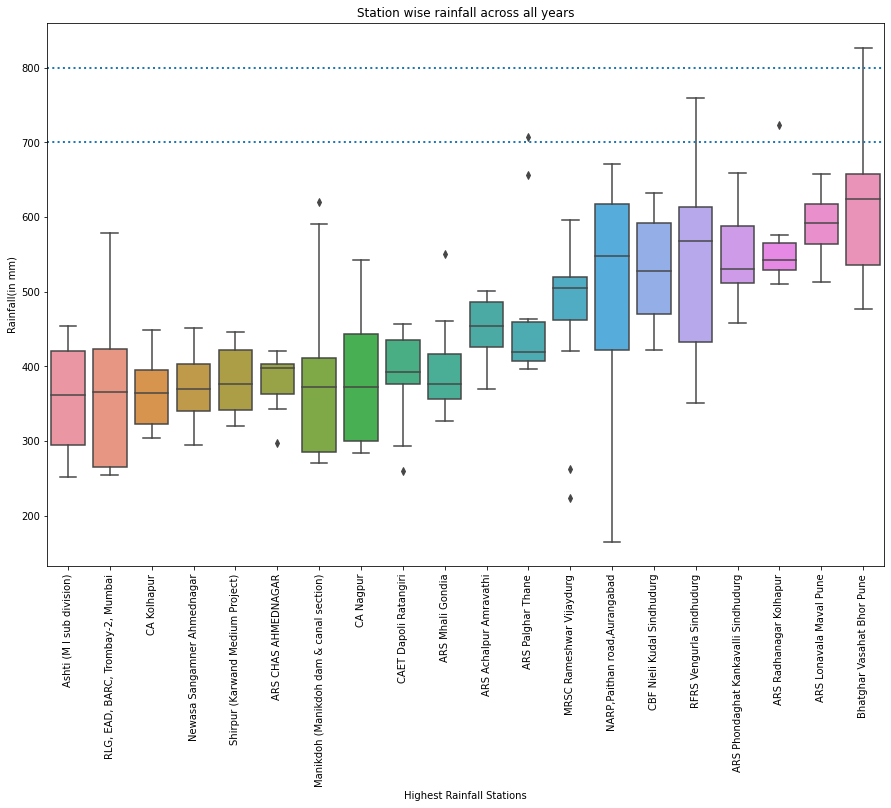

In [ ]:
matrix = matrix.drop(['Month','Year'],axis='columns')
plt.figure(figsize=(15,10))
g = sns.boxplot(x="variable", y="value", data=pd.melt(matrix))
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=90)
g.set_xlabel('Highest Rainfall Stations')
g.set_ylabel('Rainfall(in mm)')
g.set_title('Station wise rainfall across all years')
plt.axhline(y=700, linewidth=2, linestyle='dotted')
plt.axhline(y=800, linewidth=2, linestyle='dotted')
plt.show()

In [ ]:
low_df = pd.DataFrame(rainfall,columns=lowest_rainfall.index)
low_df.head()

,WDPSD Wari Telhara Akola,"ARS NIPHAD, NASIK","ZARS IGATPURI, NASIK","ZARS,Ganeshkhind,Pune",Pimpalner (Panzara irrigation colony),MERS Dindori Road Nasik,APSD Digras Yeotmal,"CoA, AMBAJOGAI, Bid","CSRS,Padegaon,Satara","CRS,Udgir,Latur",WMRS Khamgaon Georal Beed,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",CA Dhule,HPSD Fardapur Mehekar Buldhana,Hadgaon (Upper Penganga project division),WRSD Wardha Sirpur Deoli Wardha,HPSD RGS at Ambawade Khatav Satara,Dindori Peth Nashik,"Ajanta Caves, Fardapur, Aurangabad",BRS Ramtek Nagpur
0,189.029443,23.0,4.0,232.0,154.855222,159.117927,149.587590,283.0,267.0,184.936394,40.971870,657.0,0.0,232.979999,218.100943,38.0,210.588314,195.0,205.250919,844.375294
1,186.067663,23.0,4.0,232.0,159.528413,167.477480,127.045562,283.0,267.0,188.039776,41.114969,657.0,0.0,235.693953,212.068817,38.0,219.074021,195.0,198.965369,854.055396
2,194.832603,23.0,4.0,232.0,157.122615,164.788309,154.089629,283.0,267.0,182.804490,40.881689,657.0,0.0,237.112790,207.470008,38.0,225.237241,195.0,198.926919,697.260280
3,194.221476,23.0,4.0,232.0,156.968817,165.281691,179.460725,283.0,267.0,184.749099,40.916239,657.0,0.0,233.136511,237.428870,38.0,217.427276,195.0,198.244285,867.581035
4,189.201138,23.0,4.0,232.0,151.590178,165.896774,149.540561,283.0,267.0,180.512235,40.722299,657.0,0.0,230.462002,209.651249,38.0,210.809494,195.0,202.144760,626.182143


In [ ]:
low_df['Date'] = rainfall['Date']
low_df['Month'] = rainfall['month']
low_df['Year'] = rainfall['year']
low_df.head()

,WDPSD Wari Telhara Akola,"ARS NIPHAD, NASIK","ZARS IGATPURI, NASIK","ZARS,Ganeshkhind,Pune",Pimpalner (Panzara irrigation colony),MERS Dindori Road Nasik,APSD Digras Yeotmal,"CoA, AMBAJOGAI, Bid","CSRS,Padegaon,Satara","CRS,Udgir,Latur",WMRS Khamgaon Georal Beed,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",CA Dhule,HPSD Fardapur Mehekar Buldhana,Hadgaon (Upper Penganga project division),WRSD Wardha Sirpur Deoli Wardha,HPSD RGS at Ambawade Khatav Satara,Dindori Peth Nashik,"Ajanta Caves, Fardapur, Aurangabad",BRS Ramtek Nagpur,Date,Month,Year
0,189.029443,23.0,4.0,232.0,154.855222,159.117927,149.587590,283.0,267.0,184.936394,40.971870,657.0,0.0,232.979999,218.100943,38.0,210.588314,195.0,205.250919,844.375294,2008-09-24,Sep,2008
1,186.067663,23.0,4.0,232.0,159.528413,167.477480,127.045562,283.0,267.0,188.039776,41.114969,657.0,0.0,235.693953,212.068817,38.0,219.074021,195.0,198.965369,854.055396,2008-09-25,Sep,2008
2,194.832603,23.0,4.0,232.0,157.122615,164.788309,154.089629,283.0,267.0,182.804490,40.881689,657.0,0.0,237.112790,207.470008,38.0,225.237241,195.0,198.926919,697.260280,2008-09-26,Sep,2008
3,194.221476,23.0,4.0,232.0,156.968817,165.281691,179.460725,283.0,267.0,184.749099,40.916239,657.0,0.0,233.136511,237.428870,38.0,217.427276,195.0,198.244285,867.581035,2008-09-27,Sep,2008
4,189.201138,23.0,4.0,232.0,151.590178,165.896774,149.540561,283.0,267.0,180.512235,40.722299,657.0,0.0,230.462002,209.651249,38.0,210.809494,195.0,202.144760,626.182143,2008-09-28,Sep,2008


In [ ]:
matrix = low_df.groupby('Month').mean().reset_index()
matrix.head()

,Month,WDPSD Wari Telhara Akola,"ARS NIPHAD, NASIK","ZARS IGATPURI, NASIK","ZARS,Ganeshkhind,Pune",Pimpalner (Panzara irrigation colony),MERS Dindori Road Nasik,APSD Digras Yeotmal,"CoA, AMBAJOGAI, Bid","CSRS,Padegaon,Satara","CRS,Udgir,Latur",WMRS Khamgaon Georal Beed,"Ajanta Caves, Bibi-Ka-Maqbara, Aurangabad",CA Dhule,HPSD Fardapur Mehekar Buldhana,Hadgaon (Upper Penganga project division),WRSD Wardha Sirpur Deoli Wardha,HPSD RGS at Ambawade Khatav Satara,Dindori Peth Nashik,"Ajanta Caves, Fardapur, Aurangabad",BRS Ramtek Nagpur,Year
0,Apr,76.210875,113.609104,95.131639,62.828570,80.930742,106.119711,83.708081,131.090576,86.960855,129.708706,152.440226,149.891161,63.341660,94.882706,117.473873,126.989711,153.183278,160.350891,120.785711,141.322650,2014.0
1,Aug,115.089283,68.965026,138.076741,242.203542,168.037015,148.382022,201.723068,148.224346,171.595851,164.433611,126.368061,143.368941,239.253498,224.588395,213.385304,291.860262,176.136942,244.752078,194.100581,328.964074,2014.0
2,Dec,111.089631,123.546872,126.668574,106.644812,123.269890,165.841633,125.825590,189.700102,168.147482,176.601692,182.768474,159.154574,154.388995,172.171486,206.329675,114.034727,206.098701,188.426278,207.548989,138.483538,2013.5
3,Feb,90.084091,113.754705,123.835890,87.477271,109.976247,139.261390,110.051912,165.543110,127.837690,146.168986,146.894383,149.039442,115.030136,133.560679,134.905189,116.681267,178.128359,167.675396,168.994505,126.205279,2014.0
4,Jan,106.593027,128.149025,134.726034,107.857880,126.444582,144.803297,136.890966,189.985240,134.999794,177.227485,196.838107,171.215066,158.236653,143.202436,214.959843,123.389383,201.312274,175.723216,201.489981,146.802575,2014.0


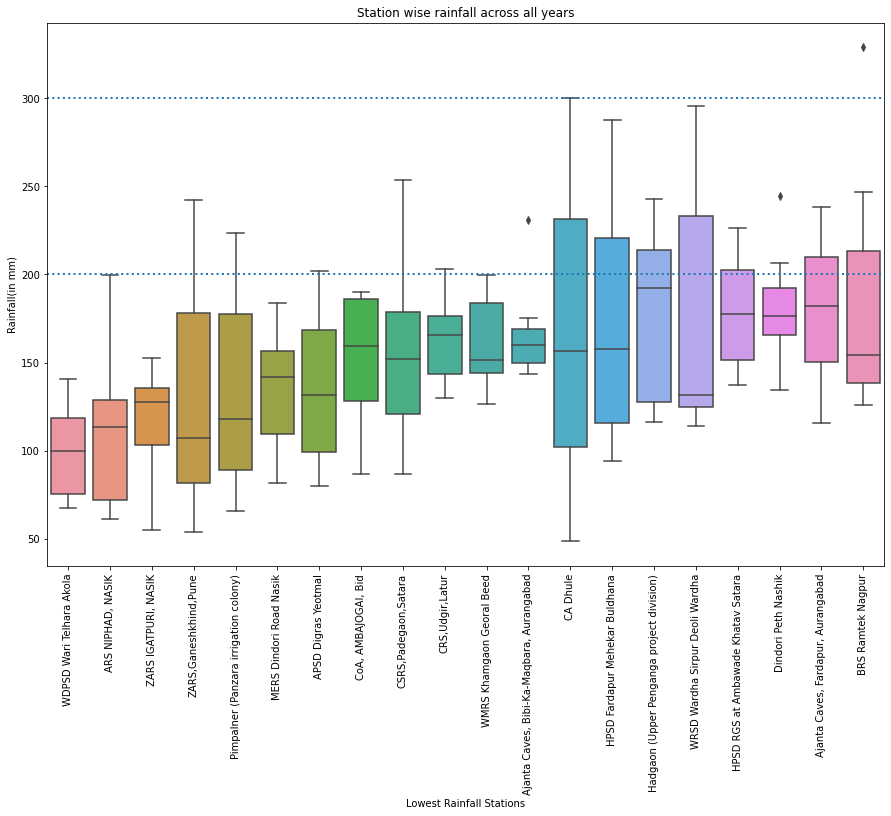

In [ ]:
matrix = matrix.drop(['Month','Year'],axis='columns')
plt.figure(figsize=(15,10))
g = sns.boxplot(x="variable", y="value", data=pd.melt(matrix))
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation=90)
g.set_xlabel('Lowest Rainfall Stations')
g.set_ylabel('Rainfall(in mm)')
g.set_title('Station wise rainfall across all years')
plt.axhline(y=200, linewidth=2, linestyle='dotted')
plt.axhline(y=300, linewidth=2, linestyle='dotted')
plt.show()

In [ ]:
matrix_season = high_df.groupby(['Year','Month']).mean().reset_index()
matrix_season.head()

,Year,Month,Ashti (M I sub division),"RLG, EAD, BARC, Trombay-2, Mumbai",CA Kolhapur,Newasa Sangamner Ahmednagar,Shirpur (Karwand Medium Project),ARS CHAS AHMEDNAGAR,Manikdoh (Manikdoh dam & canal section),CA Nagpur,CAET Dapoli Ratangiri,ARS Mhali Gondia,ARS Achalpur Amravathi,ARS Palghar Thane,MRSC Rameshwar Vijaydurg,"NARP,Paithan road,Aurangabad",CBF Nieli Kudal Sindhudurg,RFRS Vengurla Sindhudurg,ARS Phondaghat Kankavalli Sindhudurg,ARS Radhanagar Kolhapur,ARS Lonavala Maval Pune,Bhatghar Vasahat Bhor Pune
0,2008,Dec,274.031903,227.786362,316.553884,99.438596,230.878407,1207.438596,210.689788,120.490932,0.719298,973.903770,423.555303,369.692667,293.724968,1054.631579,2618.070175,1651.754386,2765.684211,723.470442,839.772459,230.779675
1,2008,Nov,278.626618,242.876175,315.171048,68.213450,253.992641,1206.380117,203.762678,221.136782,0.190058,1000.267416,434.013042,405.983534,403.599980,1048.280702,2610.660819,1647.520468,2631.517608,883.625569,869.176904,229.621223
2,2008,Oct,275.578785,252.434993,297.063749,53.820235,233.240320,1184.274335,199.983593,420.034581,55.917853,1026.951891,422.680437,360.244886,304.942989,1042.418069,2580.494800,1631.198118,918.822868,609.149965,905.039993,340.394512
3,2008,Sep,255.834600,246.418823,267.732567,39.000000,210.806903,1101.000000,207.214385,647.745405,192.552321,908.873674,405.261075,346.000000,393.402094,1030.000000,2492.637755,1623.836735,701.574016,493.000000,821.000000,384.763312
4,2009,Apr,235.078045,187.636722,164.058333,116.000000,188.644401,1223.000000,177.071362,67.752778,1.855072,871.661001,418.788235,351.000000,54.000000,845.450260,2626.871078,1655.000000,2816.331703,654.618637,825.000000,4.000000


In [ ]:
high_rainfall_stations

Index(['Ashti (M I sub division)', 'RLG, EAD, BARC, Trombay-2, Mumbai',
       'CA Kolhapur', 'Newasa Sangamner Ahmednagar',
       'Shirpur (Karwand Medium Project)', 'ARS CHAS AHMEDNAGAR',
       'Manikdoh (Manikdoh dam & canal section)', 'CA Nagpur',
       'CAET Dapoli Ratangiri', 'ARS Mhali Gondia', 'ARS Achalpur Amravathi',
       'ARS Palghar Thane', 'MRSC Rameshwar Vijaydurg',
       'NARP,Paithan road,Aurangabad', 'CBF Nieli Kudal Sindhudurg',
       'RFRS Vengurla Sindhudurg', 'ARS Phondaghat Kankavalli Sindhudurg',
       'ARS Radhanagar Kolhapur', 'ARS Lonavala Maval Pune',
       'Bhatghar Vasahat Bhor Pune'],
      dtype='object')

In [ ]:
matrix_season['stations_mean'] = matrix_season[high_rainfall_stations].sum(axis = 'columns')

In [ ]:
matrix_season.head()

,Year,Month,Ashti (M I sub division),"RLG, EAD, BARC, Trombay-2, Mumbai",CA Kolhapur,Newasa Sangamner Ahmednagar,Shirpur (Karwand Medium Project),ARS CHAS AHMEDNAGAR,Manikdoh (Manikdoh dam & canal section),CA Nagpur,CAET Dapoli Ratangiri,ARS Mhali Gondia,ARS Achalpur Amravathi,ARS Palghar Thane,MRSC Rameshwar Vijaydurg,"NARP,Paithan road,Aurangabad",CBF Nieli Kudal Sindhudurg,RFRS Vengurla Sindhudurg,ARS Phondaghat Kankavalli Sindhudurg,ARS Radhanagar Kolhapur,ARS Lonavala Maval Pune,Bhatghar Vasahat Bhor Pune,stations_mean
0,2008,Dec,274.031903,227.786362,316.553884,99.438596,230.878407,1207.438596,210.689788,120.490932,0.719298,973.903770,423.555303,369.692667,293.724968,1054.631579,2618.070175,1651.754386,2765.684211,723.470442,839.772459,230.779675,14633.067401
1,2008,Nov,278.626618,242.876175,315.171048,68.213450,253.992641,1206.380117,203.762678,221.136782,0.190058,1000.267416,434.013042,405.983534,403.599980,1048.280702,2610.660819,1647.520468,2631.517608,883.625569,869.176904,229.621223,14954.616831
2,2008,Oct,275.578785,252.434993,297.063749,53.820235,233.240320,1184.274335,199.983593,420.034581,55.917853,1026.951891,422.680437,360.244886,304.942989,1042.418069,2580.494800,1631.198118,918.822868,609.149965,905.039993,340.394512,13114.686972
3,2008,Sep,255.834600,246.418823,267.732567,39.000000,210.806903,1101.000000,207.214385,647.745405,192.552321,908.873674,405.261075,346.000000,393.402094,1030.000000,2492.637755,1623.836735,701.574016,493.000000,821.000000,384.763312,12768.653666
4,2009,Apr,235.078045,187.636722,164.058333,116.000000,188.644401,1223.000000,177.071362,67.752778,1.855072,871.661001,418.788235,351.000000,54.000000,845.450260,2626.871078,1655.000000,2816.331703,654.618637,825.000000,4.000000,13483.817628


In [ ]:
matrix_season_copy = matrix_season[['Year','Month','stations_mean']]
matrix_season_copy.head()

,Year,Month,stations_mean
0,2008,Dec,14633.067401
1,2008,Nov,14954.616831
2,2008,Oct,13114.686972
3,2008,Sep,12768.653666
4,2009,Apr,13483.817628


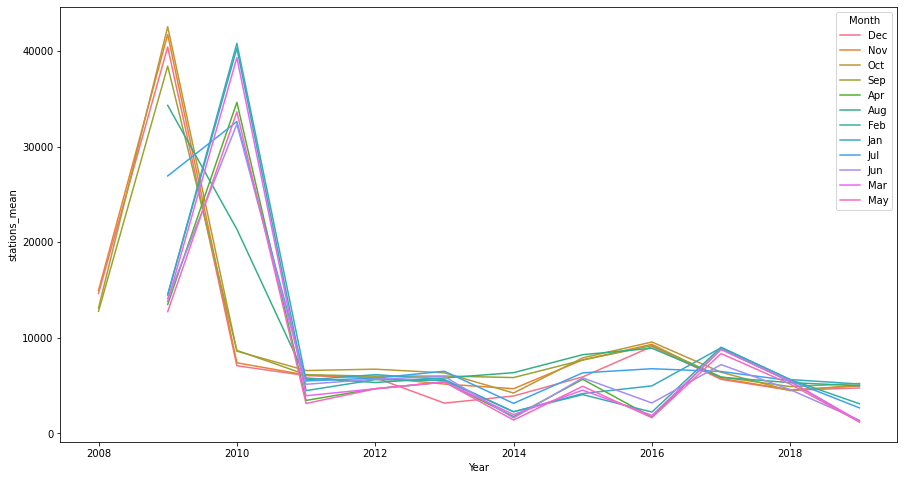

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='stations_mean',hue='Month',data=matrix_season_copy)
plt.show()

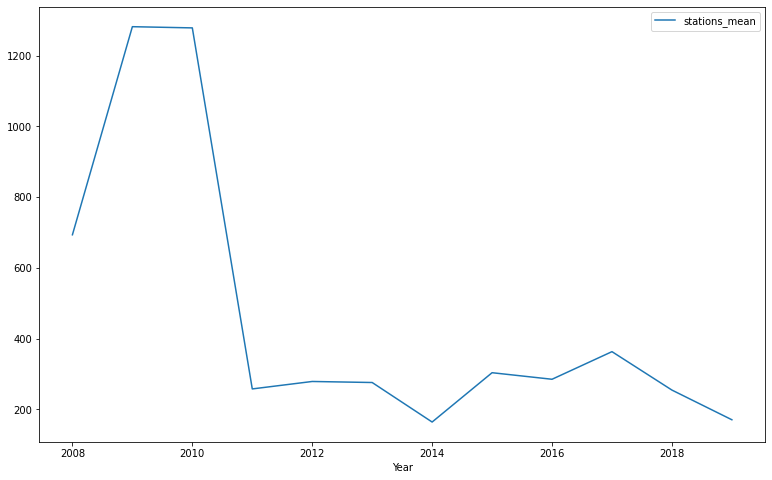

In [ ]:
matrix_season_copy.groupby('Year').plot(figsize=(13,8))
plt.show()

In [ ]:
months = matrix_season_copy.Month.unique()
# months = list(months)
# months = set(months)
months

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [ ]:
matrix_season['Jan-Feb'] = matrix_season['Jan'] + matrix_season['Feb']
matrix_season['Mar-May'] = matrix_season['Mar'] + matrix_season['Apr'] + matrix_season['May']
matrix_season['Jun-Sep'] = matrix_season['Jun'] + matrix_season['Jul'] + matrix_season['Aug'] + matrix_season['Sep']
matrix_season['Oct-Dec'] = matrix_season['Oct'] + matrix_season['Nov'] + matrix_season['Dec']
matrix_season['Annual'] = matrix_season['Jan-Feb'] + matrix_season['Mar-May'] + matrix_season['Jun-Sep'] + matrix_season['Oct-Dec']


KeyError: ignored

In [ ]:
matrix_season.columns

In [ ]:
months = matrix_season.columns[:12]
months

In [ ]:
matrix_season[months].plot(figsize=(13,8))
plt.show()

### Rough Work

In [ ]:
date1 = rainfall['Date'][0]
date1

In [ ]:
# datee = datetime.datetime.strptime(str(date1), "%Y-%m-%d")
date1.month

In [ ]:
date1.year